In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [40]:
op_gap_dnl = np.load('op_gap_dnl.npy').ravel()
op_gap_dnl_q = np.load('op_gap_dnl_q.npy').ravel()

op_gap_dsgd = np.load('op_gap_dsgd.npy').ravel()
op_gap_newton_tracking = np.load('op_gap_newton_tracking.npy').ravel()
op_gap_nn = np.load('op_gap_nn.npy').ravel()

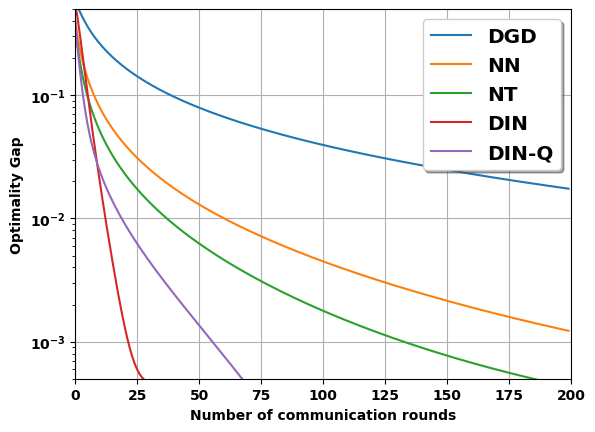

In [11]:
from scipy.interpolate import interp1d

# Assuming op_gap_dsgd, op_gap_nn, op_gap_newton_tracking, op_gap_dnl, op_gap_dnl_q are your optimization gap data
# Energy per communication round
energy_per_round = 0.0187
target_gap = 1e-3

# Function to compute energy required to reach target gap
def calculate_energy(op_gap):
    # If the algorithm reaches the target gap, find the first index where the gap <= target_gap
    if np.any(op_gap <= target_gap):
        idx = np.where(op_gap <= target_gap)[0][0]
        rounds_needed = idx
    else:
        # If it doesn't reach the target gap, use interpolation to estimate
        interp_fn = interp1d(op_gap, np.arange(len(op_gap)), kind='linear', fill_value="extrapolate")
        rounds_needed = interp_fn(target_gap)

    # Calculate the energy required
    energy_required = rounds_needed * energy_per_round
    return energy_required

# Calculate energy for each algorithm
energy_dsgd = calculate_energy(op_gap_dsgd)
energy_nn = calculate_energy(op_gap_nn)
energy_newton_tracking = calculate_energy(op_gap_newton_tracking)
energy_dnl = calculate_energy(op_gap_dnl)
energy_dnl_q = calculate_energy(op_gap_dnl_q)

# Print out the energy for each algorithm
print(f"Energy required for DGD: {energy_dsgd} J")
print(f"Energy required for NN: {energy_nn} J")
print(f"Energy required for Newton Tracking: {energy_newton_tracking} J")
print(f"Energy required for DIN: {energy_dnl} J")
print(f"Energy required for DIN-Q: {energy_dnl_q} J")

# Plot the optimization gaps and energy as a semilogy plot
plt.semilogy(op_gap_dsgd, label='DGD')
plt.semilogy(op_gap_nn, label='NN')
plt.semilogy(op_gap_newton_tracking, label='NT')
plt.semilogy(op_gap_dnl, label='DIN')
plt.semilogy(op_gap_dnl_q, label='Q-DIN')

# Plotting labels and title
plt.xlabel('Communication Rounds')
plt.ylabel('Optimization Gap (log scale)')
plt.title('Optimization Gap for Different Algorithms')
plt.legend()

# Show the plot
plt.show()


plt.xlabel('Number of communication rounds')
plt.ylabel('Optimality Gap')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.ylim([5 * 10**(-4),0.5])
plt.xlim([0, 200])
plt.savefig("OptimalityGap_comm_round.pdf")

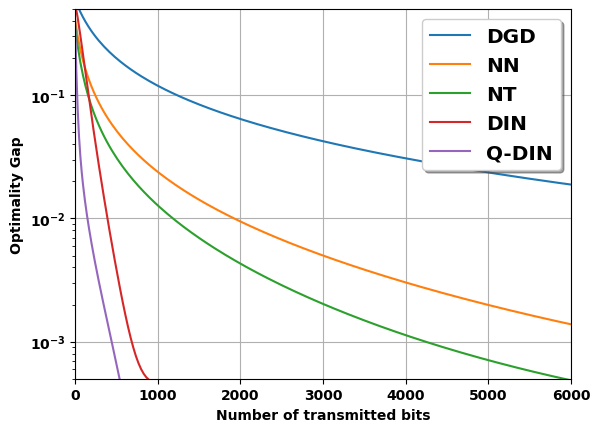

In [56]:
import matplotlib.ticker as ticker

x = [32 * i  for i in range(0, 200)]
x_q = [8 * i  for i in range(0, 200)]
plt.semilogy(x, op_gap_dsgd, label='DGD') # Descentralized Gradient Descent
plt.semilogy(x, op_gap_nn, label='NN') # Network Newton
plt.semilogy(x, op_gap_newton_tracking, label='NT') # Newton Tracking
plt.semilogy(x, op_gap_dnl, label='DIN') # Ours
plt.semilogy(x_q, op_gap_dnl_q, label='Q-DIN') # Ours

def scientific_formatter(x, pos):
    # Format as 10^x
    return r'${10^{%d}}$' % np.log10(x) if x > 0 else '0'

plt.xlabel('Number of transmitted bits')
plt.ylabel('Optimality Gap')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.ylim([5 * 10**(-4),0.5])
plt.xlim([0, 6000])
# Apply the custom formatter to the x-axis
#plt.ticklabel_format(style='sci', axis='x', scilimits=(1,1))

#plt.ticklabel_format(style='sci', axis='x', scilimits=(1,1))
plt.savefig("OptimalityGap_bits.pdf")

C:\Users\aghalkha21\AppData\Local\Temp\ipykernel_32352\3743665150.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$10^{'+str(int(np.log10(tick)))+'}$' if tick > 0 else '0' for tick in xticks])


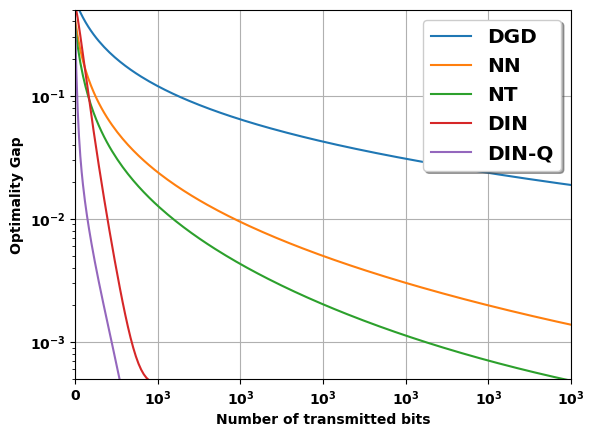

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


x = [32 * (i - 1) for i in range(1, 201)]
x_q = [8 * (i - 1) for i in range(1, 201)]

# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.semilogy(x, op_gap_dsgd, label='DGD')  # Descentralized Gradient Descent
ax.semilogy(x, op_gap_nn, label='NN')  # Network Newton
ax.semilogy(x, op_gap_newton_tracking, label='NT')  # Newton Tracking
ax.semilogy(x, op_gap_dnl, label='DIN')  # Ours
ax.semilogy(x_q, op_gap_dnl_q, label='Q-DIN')  # Ours

# Set the y axis ticks to 10^x (exponential scale)
ax.set_xlim([0, 6000])

# Set x-axis to scientific notation for ticks
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, _: '{:.0e}'.format(x)))

# Retrieve x-ticks and format them as 10^x
xticks = ax.get_xticks()
ax.set_xticklabels(['$10^{'+str(int(np.log10(tick)))+'}$' if tick > 0 else '0' for tick in xticks])

# Set labels and legend
ax.set_xlabel('Number of transmitted bits')
ax.set_ylabel('Optimality Gap')
ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Display grid
ax.grid(True)

# Set y-axis limits
ax.set_ylim([5 * 10**(-4), 0.5])

# Show the plot
plt.show()

In [55]:
from scipy.interpolate import interp1d

# Assuming op_gap_dsgd, op_gap_nn, op_gap_newton_tracking, op_gap_dnl, op_gap_dnl_q are your optimization gap data
# Energy per communication round
energy_per_round = 0.0187
target_gap = 1e-3

# Function to compute energy required to reach target gap
def calculate_energy(op_gap):
    # If the algorithm reaches the target gap, find the first index where the gap <= target_gap
    if np.any(op_gap <= target_gap):
        idx = np.where(op_gap <= target_gap)[0][0]
        rounds_needed = idx
    else:
        # If it doesn't reach the target gap, use interpolation to estimate
        interp_fn = interp1d(op_gap, np.arange(len(op_gap)), kind='linear', fill_value="extrapolate")
        rounds_needed = interp_fn(target_gap)

    # Calculate the energy required
    energy_required = rounds_needed * energy_per_round
    return energy_required

# Calculate energy for each algorithm
energy_dsgd = calculate_energy(op_gap_dsgd)
energy_nn = calculate_energy(op_gap_nn)
energy_newton_tracking = calculate_energy(op_gap_newton_tracking)
energy_dnl = calculate_energy(op_gap_dnl)
energy_dnl_q = 0.25 * calculate_energy(op_gap_dnl_q)

# Print out the energy for each algorithm
print(f"Energy required for DGD: {energy_dsgd} J")
print(f"Energy required for NN: {energy_nn} J")
print(f"Energy required for Newton Tracking: {energy_newton_tracking} J")
print(f"Energy required for DIN: {energy_dnl} J")
print(f"Energy required for DIN-Q: {energy_dnl_q} J")


Energy required for DGD: 6.4184931613199145 J
Energy required for NN: 4.053632051740835 J
Energy required for Newton Tracking: 2.4871000000000003 J
Energy required for DIN: 0.41140000000000004 J
Energy required for DIN-Q: 0.26180000000000003 J


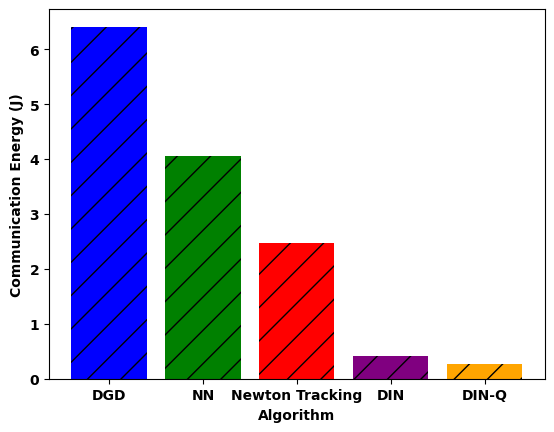

In [62]:
# Energy values for each algorithm
energy_values = {
    'DGD': 6.41,
    'NN': 4.05,
    'Newton Tracking': 2.48,
    'DIN': 0.41,
    'DIN-Q': 0.26
}

# Colors and styles for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']
hatches = ['/', '/', '/', '/', '/']
#plt.grid()

# Create a bar plot with different colors and styles
bars = plt.bar(energy_values.keys(), energy_values.values(), color=colors)

# Add hatches to the bars
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Communication Energy (J)')
#plt.title('Energy Required for Each Algorithm')
plt.savefig("Communication_Energy_barplot.pdf")
# Display the plot
plt.show()